In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\A393350\Desklocalhost:8888/notebooks/Desktop/Kaggle/AceaSmartWaterAnalytics/notebookDada.ipynbtop\Kaggle\AceaSmartWaterAnalytics\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore
import matplotlib.dates as mdates

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv(r"C:\Users\A393350\Desktop\Kaggle\AceaSmartWaterAnalytics\data/Aquifer_Petrignano.csv")
#df.head()
df = df[["Date","Depth_to_Groundwater_P25"]]
df.head()

,Date,Depth_to_Groundwater_P25
0,14/03/2006,-22.18
1,15/03/2006,-22.14
2,16/03/2006,-22.04
3,17/03/2006,-22.04
4,18/03/2006,-22.04


In [4]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.head()

,Date,Depth_to_Groundwater_P25
0,2006-03-14,-22.18
1,2006-03-15,-22.14
2,2006-03-16,-22.04
3,2006-03-17,-22.04
4,2006-03-18,-22.04


In [5]:
print('The earliest date: \t%s' %df['Date'].values[[0, -1]][0])
print('The latest date: \t%s' %df['Date'].values[[0, -1]][1])
print(df.shape)

The earliest date: 	2006-03-14T00:00:00.000000000
The latest date: 	2020-06-30T00:00:00.000000000
(5223, 2)


In [6]:
feature_col=list(df.columns[1:])
feature_col

['Depth_to_Groundwater_P25']

# 1. Data Visualization

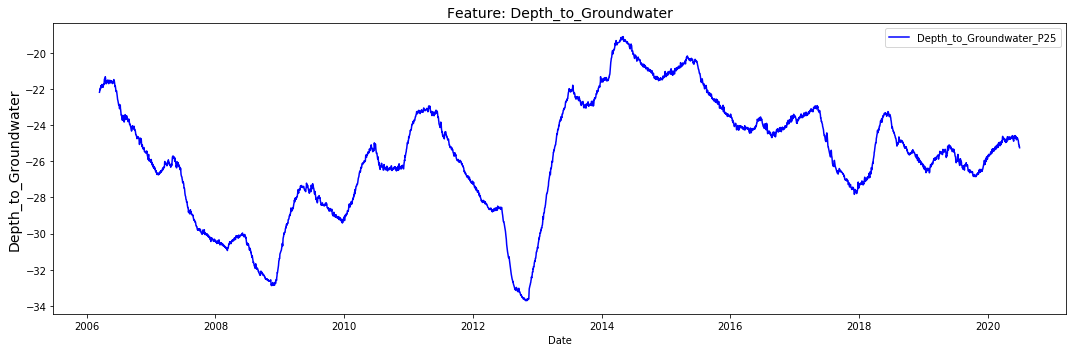

In [7]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
    
sns.lineplot(x=df['Date'].where(df['Depth_to_Groundwater_P25'].notnull()), y=df['Depth_to_Groundwater_P25'].fillna(np.inf), ax=ax, color='blue',label='Depth_to_Groundwater_P25')
ax.set_title('Feature: {}'.format('Depth_to_Groundwater'), fontsize=14)
ax.set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)

plt.tight_layout()
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      5223 non-null   datetime64[ns]
 1   Depth_to_Groundwater_P25  5184 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 81.7 KB


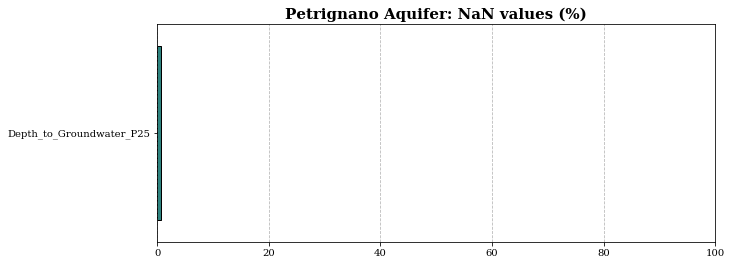

In [9]:
#Check missing values
NaN_values = (df[feature_col].isnull().sum() / len(df) * 100).sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (10, 4))
plt.title('Petrignano Aquifer: NaN values (%)', size = 15, fontweight = 'bold', fontfamily = 'serif')
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
sns.barplot(x = NaN_values, y = NaN_values.index, edgecolor = 'black', ax = ax,
                palette = reversed(sns.color_palette("viridis", len(NaN_values.index))))
ax.set_xlim((0, 100))    
ax.set_xticklabels(range(0, 101, 20), fontfamily = 'serif')
ax.set_yticklabels(NaN_values.index, fontfamily = 'serif')
ax.grid(axis = 'x', linestyle = '--', alpha = 0.9)
plt.show()


In [10]:
print('The earliest date: \t%s' %df['Date'].values[0])
print('The latest date: \t%s' %df['Date'].values[-1])
print(df.shape)

The earliest date: 	2006-03-14T00:00:00.000000000
The latest date: 	2020-06-30T00:00:00.000000000
(5223, 2)


In [11]:
df = df.sort_values(by='Date')

df['Time_Interval'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'Time_Interval']].head()

,Date,Time_Interval
0,2006-03-14,NaT
1,2006-03-15,1 days
2,2006-03-16,1 days
3,2006-03-17,1 days
4,2006-03-18,1 days


In [12]:
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

1 days    5222
Name: Time_Interval, dtype: int64


In [13]:
df.isna().sum()

Date                         0
Depth_to_Groundwater_P25    39
dtype: int64

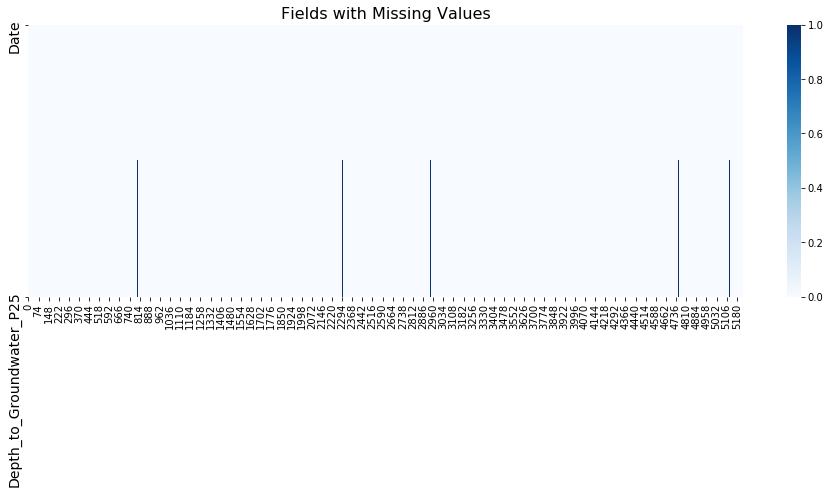

In [14]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
# for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

# Interpolate missing values

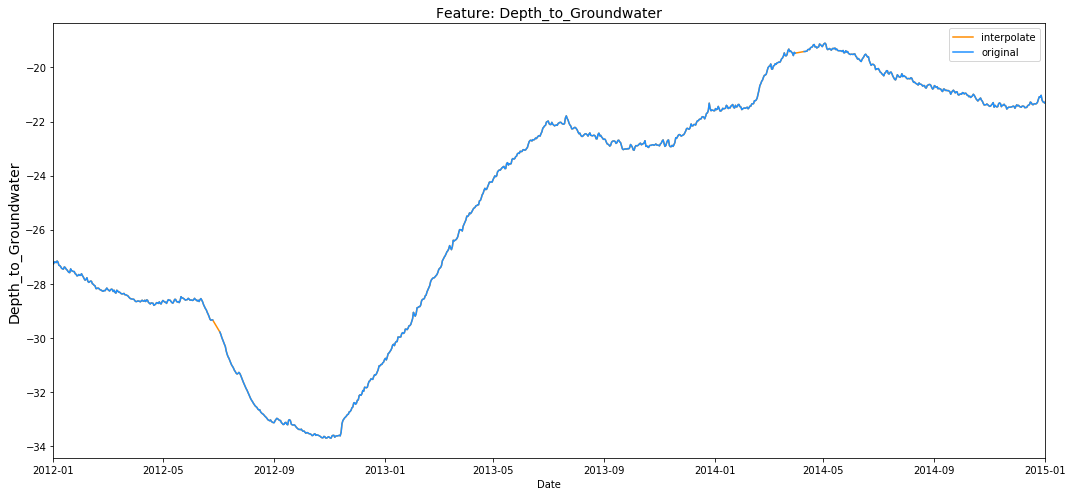

In [15]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25.interpolate(), ax=ax, color='darkorange', label = 'interpolate')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25.fillna(np.inf), ax=ax, color='dodgerblue', label = 'original')
ax.set_title(f'Feature: Depth_to_Groundwater', fontsize=14)
ax.set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)
ax.set_xlim([date(2012, 1, 1), date(2015, 1, 1)])
# ax[2].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

In [16]:
df = df.rename(columns={"Depth_to_Groundwater_P25":"Depth_to_Groundwater"})
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5223 entries, 0 to 5222
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  5223 non-null   datetime64[ns]
 1   Depth_to_Groundwater  5223 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 251.5 KB


In [17]:
#df_downsampled = df[['Date',
#                     'Depth_to_Groundwater'
#                    ]].resample('7D', on='Date').mean().reset_index(drop=False)
#
#df = df_downsampled

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['Depth_to_Groundwater']

for column in core_columns:
    decomp = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq') # .set_index('Date')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

In [19]:
df.head()

,Date,Depth_to_Groundwater,Depth_to_Groundwater_trend,Depth_to_Groundwater_seasonal
0,2006-03-14,-22.18,-21.634506,0.005247
1,2006-03-15,-22.14,-21.634578,0.000757
2,2006-03-16,-22.04,-21.634649,0.008875
3,2006-03-17,-22.04,-21.634721,0.011070
4,2006-03-18,-22.04,-21.634793,0.003161


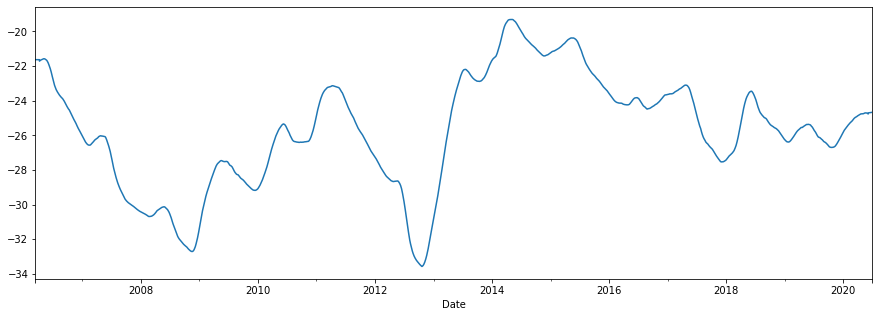

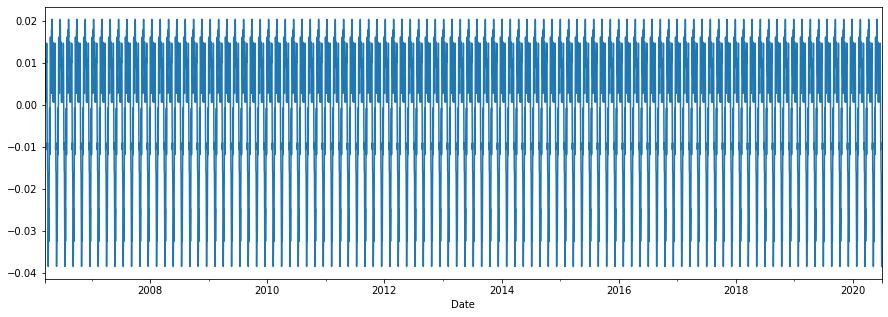

In [20]:
df.set_index("Date")["Depth_to_Groundwater_trend"].plot(figsize=(15,5))
plt.show()

df.set_index("Date")["Depth_to_Groundwater_seasonal"].plot(figsize=(15,5))
plt.show()

In [21]:

#from prophet import Prophet
#
##prepare input data for model
##The input to Prophet is always a dataframe with two columns: ds and y. 
#
#feature_columns = [
#    'Rainfall',
#    'Temperature',
#    'Drainage_Volume',
#    'River_Hydrometry',
#]
#target_column = ['Depth_to_Groundwater']
#
#train_size = int(0.85 * len(df))
#
#pro_df = df[['Date'] + target_column + feature_columns].copy()
#pro_df.columns = ['ds', 'y'] + feature_columns
#
#train = pro_df.iloc[:train_size, :]
#train.head()


In [22]:
#
#x_train, y_train = pd.DataFrame(pro_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(pro_df.iloc[:train_size, 1])
#x_test, y_test = pd.DataFrame(pro_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(pro_df.iloc[train_size:, 1])

In [23]:
#
## Train the model
#model = Prophet()
#model.add_regressor('Rainfall')
#model.add_regressor('Temperature')
#model.add_regressor('Drainage_Volume')
#model.add_regressor('River_Hydrometry')
#
#model.fit(train)
#
## x_valid = model.make_future_dataframe(periods=test_size, freq='w')
#
## Predict on test set
#y_pred = model.predict(x_test)
#
## Calcuate metrics
#score_mae = mean_absolute_error(y_test, y_pred['yhat'])
#score_rmse = math.sqrt(mean_squared_error(y_test, y_pred['yhat']))
#
#print('MAE: {}'.format(score_mae))
#print('RMSE: {}'.format(score_rmse))

In [24]:
#
## Plot the forecast
#f, ax = plt.subplots(1, figsize=(8,4))
#
#model.plot(y_pred, ax=ax)
#sns.lineplot(x=x_test['ds'], y=y_test['y'], ax=ax, color='orange', label='Ground truth') 
#sns.lineplot(x=x_train['ds'], y=y_train['y'], ax=ax, color='black', label='Train') 
#
#ax.set_title(f'Prophet Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
#ax.set_xlabel(xlabel='Date', fontsize=14)
#ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
#
#plt.show()

 # Baseline model 

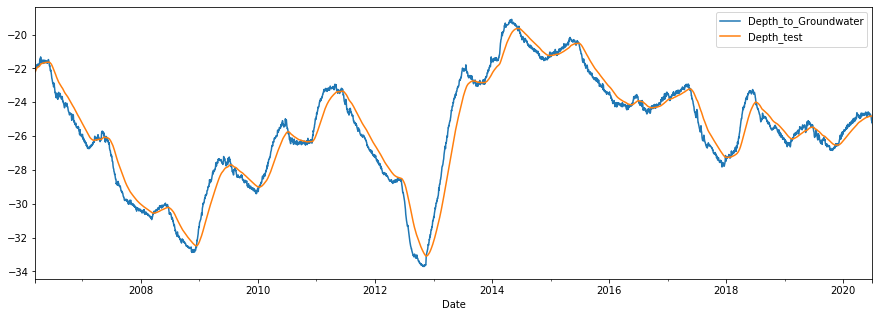

In [29]:
#df["Depth_to_Groundwater"].ewm(span=200).mean()
df["Depth_test"] = df["Depth_to_Groundwater"].ewm(span=90).mean()

df.set_index("Date")[["Depth_to_Groundwater","Depth_test"]].plot(figsize=(15,5))

# ARIMA

## Check stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
df

,Date,Depth_to_Groundwater,Depth_to_Groundwater_trend,Depth_to_Groundwater_seasonal,Depth_test
0,2006-03-14,-22.18,-21.634506,0.005247,-22.180000
1,2006-03-15,-22.14,-21.634578,0.000757,-22.159778
2,2006-03-16,-22.04,-21.634649,0.008875,-22.118961
3,2006-03-17,-22.04,-21.634721,0.011070,-22.098558
4,2006-03-18,-22.04,-21.634793,0.003161,-22.086320
...,...,...,...,...,...
5218,2020-06-26,-25.07,-24.677668,-0.015704,-24.833534
5219,2020-06-27,-25.11,-24.676317,-0.015971,-24.839610
5220,2020-06-28,-25.19,-24.674966,-0.026988,-24.847311
5221,2020-06-29,-25.18,-24.673615,-0.031910,-24.854623


In [34]:
adfuller(df["Depth_to_Groundwater"], autolag='AIC')
# The p-value <0.05 -> the series is stationary
"""
Interpretation of results:
- test statistic - the more negative the more likely to be stationary
- p-value -> less than 0.05 then reject null hypothesis (non-stationarity) so we are more confident that it is stationary
- critical test statistics

(-3.1604976700766043,
 0.022388147805932162,
 28,
 5194,
 {'1%': -3.431609633182582,
  '5%': -2.8620966262332583,
  '10%': -2.5670662920324077},
 -14552.455142994011)

In [69]:
# We will use differenciator as much until we get a test that the data is stationary
df["Depth_to_Groundwater_diff"] = df["Depth_to_Groundwater"].diff()
adfuller(df["Depth_to_Groundwater_diff"].dropna(), autolag='AIC')

(-6.126333116533711,
 8.611293592837683e-08,
 27,
 5194,
 {'1%': -3.431609633182582,
  '5%': -2.8620966262332583,
  '10%': -2.5670662920324077},
 -14542.896429054817)

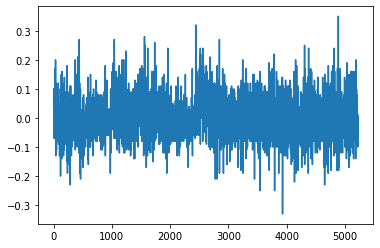

In [76]:
# Apply difference to check
df["Depth_to_Groundwater_diff"].plot()
plt.show()

In [70]:
df["Depth_to_Groundwater_diff2"] = df["Depth_to_Groundwater"].diff().diff()
adfuller(df["Depth_to_Groundwater_diff2"].dropna(), autolag='AIC')

(-24.72770966593437,
 0.0,
 26,
 5194,
 {'1%': -3.431609633182582,
  '5%': -2.8620966262332583,
  '10%': -2.5670662920324077},
 -14505.043922135406)

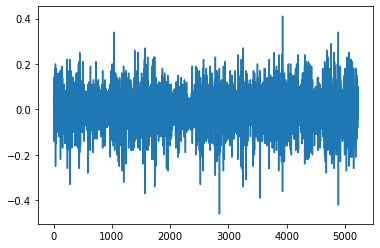

In [71]:
# Apply difference to check
df["Depth_to_Groundwater_diff2"].plot()
plt.show()

## Autocorrelation and partial autocorrelation

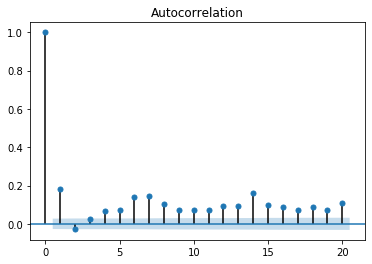

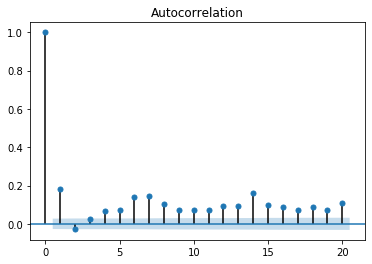

In [72]:
# Plot against the p-value. where spike is above the blue line, there is a correlation with lags: 1, 4, 5 etc
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["Depth_to_Groundwater_diff"].dropna(), lags=20) # the transformed variable looks better

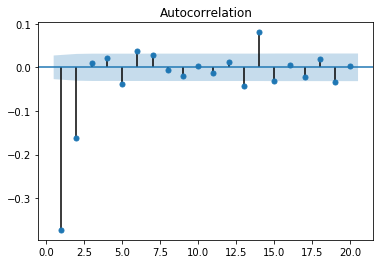

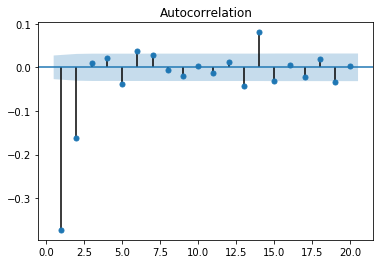

In [81]:
# Plot against the p-value. where spike is above the blue line, there is a correlation with lags: 1, 4, 5 etc
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["Depth_to_Groundwater_diff2"].dropna(), lags=20, zero = False) # the transformed variable looks better

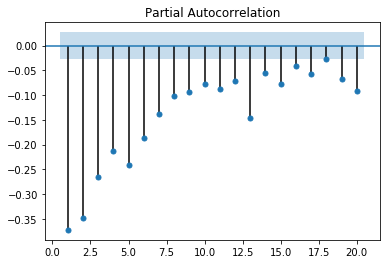

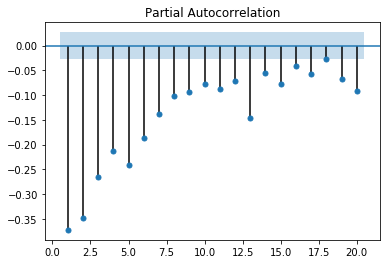

In [80]:
# Plot against the p-value. where spike is above the blue line, there is a correlation with lags: 1, 4, 5 etc
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df["Depth_to_Groundwater_diff2"].dropna(), lags=20, zero=False) # the transformed variable looks better

## Choosing a model

In [64]:
# Our data is stationary so we will be using ARIMA and not exponential methods 
# AR (autoregressive) + I (integrated) + MA (moving average)
# p = order of the autoregression (according to lags)
# d = order of differenciating
# q = order of moving average
# you choose the parameters based on how many lags you want to get as in sequence 
# AR and MA do not necessarily get used together, sometimes just one of them and so p or q becomes 0

In [98]:
# We set MA of step 2 because of the lags
# For our case, we only use MA: so 0.2.2 - but then we play with parameters to find best model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["Depth_to_Groundwater"].dropna(), (0,2,2)) #using the original dataset
res_022 = model.fit()
print(res_022.summary())

                                ARIMA Model Results                                
Dep. Variable:     D2.Depth_to_Groundwater   No. Observations:                 5221
Model:                      ARIMA(0, 2, 2)   Log Likelihood                7204.996
Method:                            css-mle   S.D. of innovations              0.061
Date:                     Mon, 06 Jun 2022   AIC                         -14401.991
Time:                             13:44:59   BIC                         -14375.749
Sample:                                  2   HQIC                        -14392.814
                                                                                   
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -5.005e-06   3.12e-05     -0.160      0.873   -6.62e-05    5.62e-05
ma.L1.D2.Depth_to_Groundwater    -

In [100]:
# We set MA of step 2 because of the lags
# For our case, we only use MA: so 0.2.2 - but then we play with parameters to find best model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["Depth_to_Groundwater"].dropna(), (0,2,0)) #using the original dataset
res_020 = model.fit()
print(res_020.summary())

                                ARIMA Model Results                                
Dep. Variable:     D2.Depth_to_Groundwater   No. Observations:                 5221
Model:                      ARIMA(0, 2, 0)   Log Likelihood                5721.318
Method:                                css   S.D. of innovations              0.081
Date:                     Mon, 06 Jun 2022   AIC                         -11438.636
Time:                             13:45:44   BIC                         -11425.515
Sample:                                  2   HQIC                        -11434.048
                                                                                   
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.107e-05      0.001     -0.019      0.985      -0.002       0.002


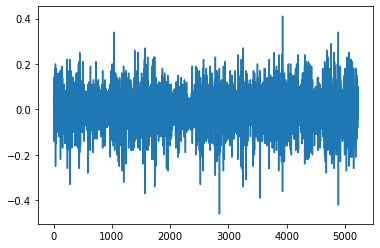

In [103]:
res_020.resid.plot()

In [115]:
# We set MA of step 2 because of the lags
# For our case, we only use MA: so 0.2.2 - but then we play with parameters to find best model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["Depth_to_Groundwater"].dropna(), (1,2,0)) #using the original dataset
res_120 = model.fit()
print(res_120.summary())

                                ARIMA Model Results                                
Dep. Variable:     D2.Depth_to_Groundwater   No. Observations:                 5221
Model:                      ARIMA(1, 2, 0)   Log Likelihood                6111.551
Method:                            css-mle   S.D. of innovations              0.075
Date:                     Mon, 06 Jun 2022   AIC                         -12217.103
Time:                             13:52:55   BIC                         -12197.422
Sample:                                  2   HQIC                        -12210.220
                                                                                   
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -2.004e-05      0.001     -0.026      0.979      -0.002       0.001
ar.L1.D2.Depth_to_Groundwater    -

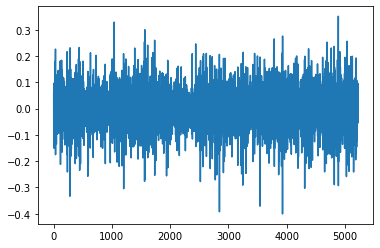

In [117]:
res_120.resid.plot()

In [120]:
# We set MA of step 2 because of the lags
# For our case, we only use MA: so 0.2.2 - but then we play with parameters to find best model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["Depth_to_Groundwater"].dropna(), (2,2,0)) #using the original dataset
res_220 = model.fit()
print(res_220.summary())


                                ARIMA Model Results                                
Dep. Variable:     D2.Depth_to_Groundwater   No. Observations:                 5221
Model:                      ARIMA(2, 2, 0)   Log Likelihood                6449.797
Method:                            css-mle   S.D. of innovations              0.070
Date:                     Mon, 06 Jun 2022   AIC                         -12891.593
Time:                             13:54:04   BIC                         -12865.352
Sample:                                  2   HQIC                        -12882.416
                                                                                   
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.895e-05      0.001     -0.036      0.971      -0.001       0.001
ar.L1.D2.Depth_to_Groundwater    -

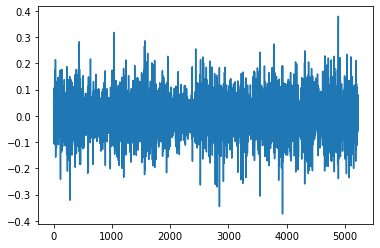

In [121]:
res_220.resid.plot()

In [131]:
# We set MA of step 2 because of the lags
# For our case, we only use MA: so 0.2.2 - but then we play with parameters to find best model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df["Depth_to_Groundwater"].dropna(), (0,2,0)) #using the original dataset
res_220 = model.fit()
print(res_220.summary())

                                ARIMA Model Results                                
Dep. Variable:     D2.Depth_to_Groundwater   No. Observations:                 5221
Model:                      ARIMA(0, 2, 0)   Log Likelihood                5721.318
Method:                                css   S.D. of innovations              0.081
Date:                     Mon, 06 Jun 2022   AIC                         -11438.636
Time:                             13:58:36   BIC                         -11425.515
Sample:                                  2   HQIC                        -11434.048
                                                                                   
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.107e-05      0.001     -0.019      0.985      -0.002       0.002


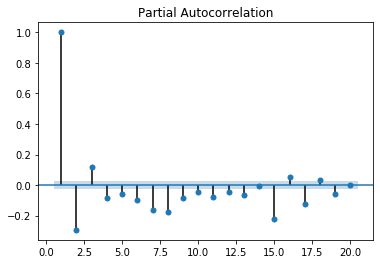

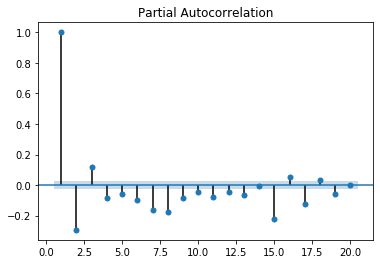

In [172]:
plot_pacf(np.sqrt(abs(df["Depth_to_Groundwater"])).dropna(), lags=20, zero=False) # the transformed variable looks better

In [182]:
model = ARIMA(np.sqrt(abs(df["Depth_to_Groundwater"])), (0,0,0)) #using the original dataset
res_000 = model.fit()
print(res_000.summary())

                               ARMA Model Results                               
Dep. Variable:     Depth_to_Groundwater   No. Observations:                 5223
Model:                       ARMA(0, 0)   Log Likelihood               -1401.904
Method:                             css   S.D. of innovations              0.316
Date:                  Mon, 06 Jun 2022   AIC                           2807.808
Time:                          14:27:40   BIC                           2820.929
Sample:                               0   HQIC                          2812.397
                                                                                
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0592      0.004   1155.351      0.000       5.051       5.068


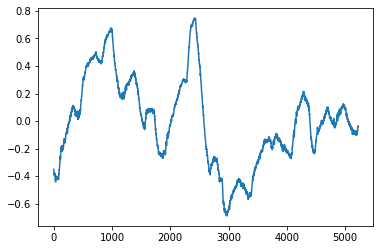

In [166]:
res_000.resid.plot()

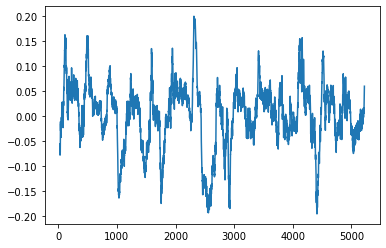

In [180]:
np.sqrt(abs(df["Depth_to_Groundwater"])).diff(30).plot()

In [ ]:

df["Depth_test"] = df["Depth_to_Groundwater"].ewm(span=90).mean()
df.set_index("Date")[["Depth_to_Groundwater","Depth_test"]].plot(figsize=(15,5))